# Bitcoin, gold, silver and oil.

We will use least squares to determine the relationship between the bitcoin price and prices of three comodities namely, oil, silved and gold, during the last year

The information is given in a CSV format, so we have to assign a dataframe to a new variable and open the CSV file. The dataframe will allow us to see and work with the data easily, so let's create the variable "data" and see the dataset.

In [98]:
using CSV
using DataFrames

In [99]:
data = DataFrame(CSV.File("C:/Users/maria/Desktop/Universidad/2022-I/Matemáticas para ML/Databases/bitsgo.csv"));
data

,Column1,Date,Bitcoin_Price,Gold_Price,Silver_Price,Oil_Price
,Int64,Date…,Float64,Float64,Float64,Float64
1,0,2021-01-01,29374.2,1887.6,26.525,53.55
2,1,2021-01-02,32127.3,1943.2,27.008,53.55
3,2,2021-01-03,32782.0,1943.2,27.008,60.64
4,3,2021-01-04,31971.9,1943.2,27.584,61.45
5,4,2021-01-05,33992.4,1940.35,27.867,67.72
6,5,2021-01-06,36824.4,1931.95,27.27,67.72
7,6,2021-01-07,39371.0,1920.1,27.473,75.23
8,7,2021-01-08,40797.6,1862.9,24.845,68.59
9,8,2021-01-09,40254.5,1847.25,25.133,68.59


Since we have the dataframe, we are going to organize the data of each column in an array, that is, we will convert the Bitcoin price column into an array (Bit), and each of the commodity price columns into an array (Gold, Silver and Oil respectively), so it will be more easy to work with the information.

In [100]:
Bit = Array(data.Bitcoin_Price);
Gold = Array(data.Gold_Price);
Silver = Array(data.Silver_Price);
Oil = Array(data.Oil_Price);

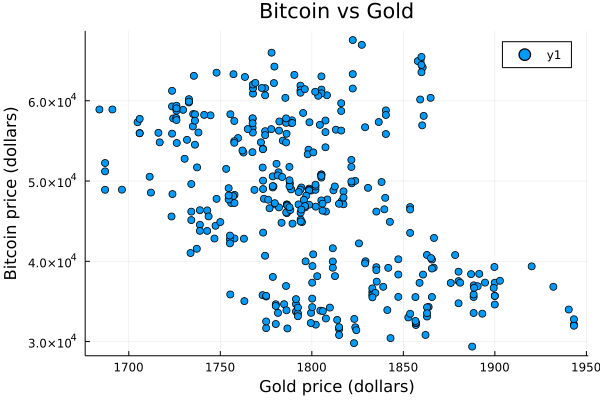

In [101]:
#Plot the Bitcoin Price vs Gold Price
using Plots
plot(Gold, Bit, seriestype = scatter,
    title = "Bitcoin vs Gold", 
    ylabel = "Bitcoin price (dollars)", 
    xlabel = "Gold price (dollars)")

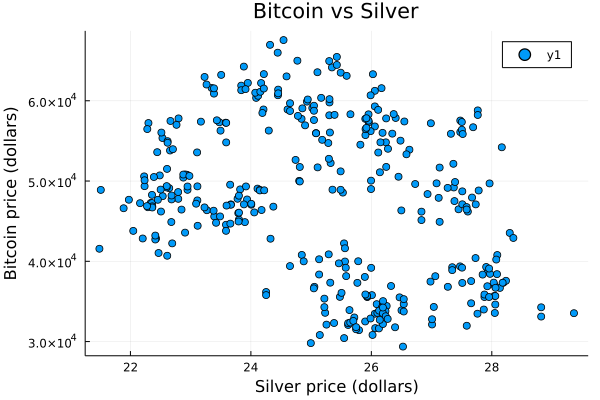

In [102]:
#Plot the Bitcoin Price vs Silver Price
using Plots
plot(Silver, Bit, seriestype = scatter, title = "Bitcoin vs Silver", ylabel = "Bitcoin price (dollars)", xlabel = "Silver price (dollars)")

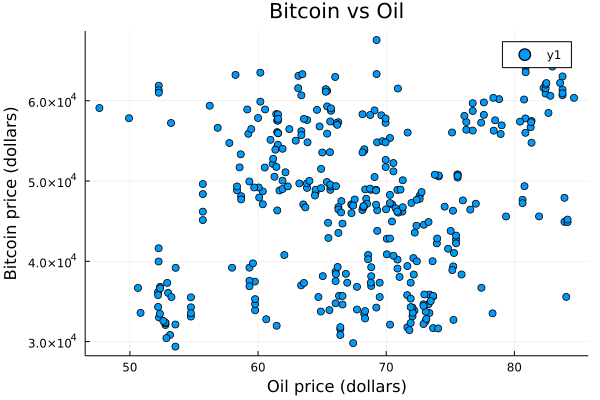

In [103]:
#Plot the Bitcoin Price vs Oil Price
using Plots
plot(Oil, Bit, seriestype = scatter, title = "Bitcoin vs Oil", ylabel = "Bitcoin price (dollars)", xlabel = "Oil price (dollars)")

Least squares formulation:

$\tilde{x} = \mbox{arg min}_{x} \| Ax - b \|_2^2$

In [104]:
A = data[:, 4:6];
N = size(data,1);
A_1 = [ones(N,1) Array(A)];
b = Bit;

Least squares solution:

$\tilde{x} = \mbox{arg min}_{x} J(\mathbf x) = \mbox{arg min}_{x} \| Ax - b \|_2^2$

$J(x) = \| Ax - b\|_2^2 = ( Ax - b )^T ( Ax - b ) = (A x)^T (A x) - (A x)^T b - b^T (A x) + b^T b$

$J(x) = x^T A^T Ax - 2 x^T A^T b + b^T b$

Now **minimizing** $J(x)$ w.r.t $x$:

$\frac{\partial J(x)}{\partial  x} = - 2 A^T b + 2 A^T A x = 0$

We obtain the [normal equations](https://en.wikipedia.org/wiki/Linear_least_squares#Derivation_of_the_normal_equations):

$A^T A x = A^T b$

The solution:

$x = (A^T A)^{-1} A^T  b = A^+ b$

With $A^+ = (A^T A)^{-1} A^T$ the Moore-Penrose pseudoinverse of $A$.




For the next part, we are going to use three diferent methods to solve the problem.

* Using the unique least squares approximate solution of overdetermined equations

$(A^T A)^{-1} A^T$y

In [105]:
x_1 = inv(transpose(A_1)*A_1)*(transpose(A_1)*b)

4-element Vector{Float64}:
 184875.9926691563
    -78.28826199535581
   -455.20588020060677
    218.7495042028895

* Using the Moore-Penrose pseudoinverse.

In [106]:
using LinearAlgebra
pseu = pinv(A_1)*b

4-element Vector{Float64}:
 184875.99266903132
    -78.28826199526631
   -455.20588020211324
    218.74950420285202

* Using the QR descomposition.

In [107]:
x_2 = A_1\b

4-element Vector{Float64}:
 184875.9926690317
    -78.28826199526628
   -455.2058802021095
    218.74950420284986

Now we present the model.

In [108]:
pred = A_1*pseu

365-element Vector{Float64}:
 36738.76930446829
 32166.077497393868
 33717.01148219209
 33631.99999359998
 35097.857667541175
 36027.236978782064
 38505.354866308386
 42727.227797701824
 43821.339804429546
 45416.02369006833
 47046.1611107359
 43401.02211008663
 39194.1480054554
     ⋮
 49032.35533719297
 49760.84473762126
 50061.95806815084
 49249.125138468546
 49652.155432355685
 49666.72202052215
 49666.72202052215
 49620.74622662174
 49650.346347158236
 50754.19667493719
 49829.50009371023
 49308.116270970524

Plot the model.

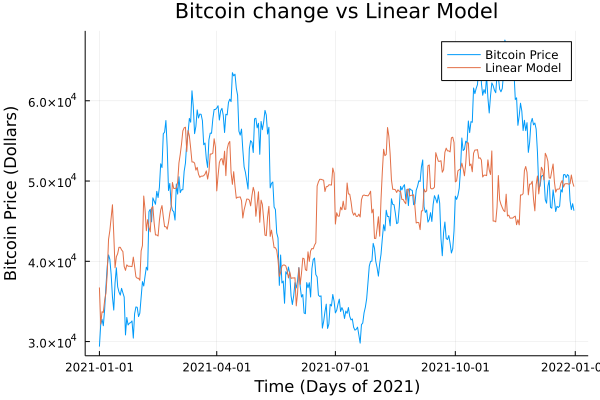

In [109]:
using Plots
plot(data.Date, Bit,
    title = "Bitcoin change vs Linear Model",
    label = "Bitcoin Price",
    ylabel = "Bitcoin Price (Dollars)",
    xlabel = "Time (Days of 2021)")
plot!(data.Date, pred, label = "Linear Model")

As we can see, the model has a similar behavior that the real data in the first semester, later the behavior of the model isn't similar respect the data, in fact, it begins to be the opposite.

This is a good approach to study the correlation between the price of Bitcoin and the price of each of the comodities.

To continue with the study of the correlation between the price of Bitcoin and the comodities we are going to calculate the correlation matrix of these. 

The correlation matrix shows Pierson's correlation coefficient, which measures the degree of linear relationship between each pair of variables. 

In [110]:
#Correlation Matrix
using StatsBase
cor(Array(data[:, 3:6]))

4×4 Matrix{Float64}:
  1.0       -0.447571   -0.322458   0.231068
 -0.447571   1.0         0.462316  -0.0537265
 -0.322458   0.462316    1.0       -0.294479
  0.231068  -0.0537265  -0.294479   1.0

The correlation matrix is organized as you can see below 


\begin{equation*}
    \begin{matrix}
     & Bitcoin & Gold & Silver & Oil \\
     Bitcoin & 1  & -0.447571 & -0.322458 & 0.231068 \\
     Gold    & -0.447571 & 1 & 0.462316 & -0.0537265 \\
     Silver  &  -0.322458  & 0.462316  & 1 & -0.294479 \\
     Oil     & 0.231068 & -0.0537265 & -0.294479 & 1 
    \end{matrix}
\end{equation*}

With this organization we see that the diagonal is the relationship of each price of the variables with itself, and the row and column relationship is the degree of linear relationship of one price with the other, we will focus on the values of the first row of the column 2 onwards. 

The Pearson's correlation coefficient has a value between $-1$ and $1$, and their interpretation is:

* -1 indicates perfectly negative linear correlation between two variables.
* 0 indicates that there is no linear correlation between the two variables.
* 1 indicates a perfectly positive linear correlation between two variables.

If the correlation coefficient is far from zero, the stronger the relationship between the two variables. 

It is common to assume the normal distribution of the data to study them, to verify this statement a tool known as qq-plot is used.  
A Quantile-Quantile plot allows you to see how close the distribution of a data set to some ideal distribution or compare the distribution of two data sets. In this case, the ideal is that the points approach a diagonal line. 

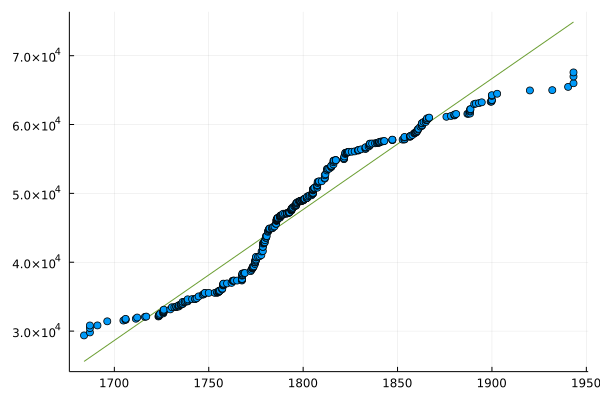

In [111]:
using StatsPlots
plot(qqplot(Gold, Bit, qqline = :fit))

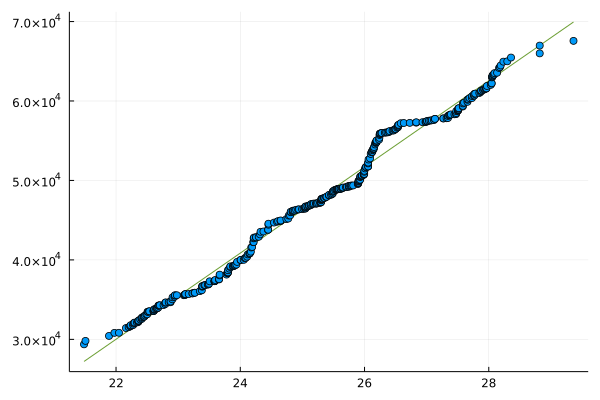

In [112]:
plot(qqplot(Silver, Bit, qqline = :fit))

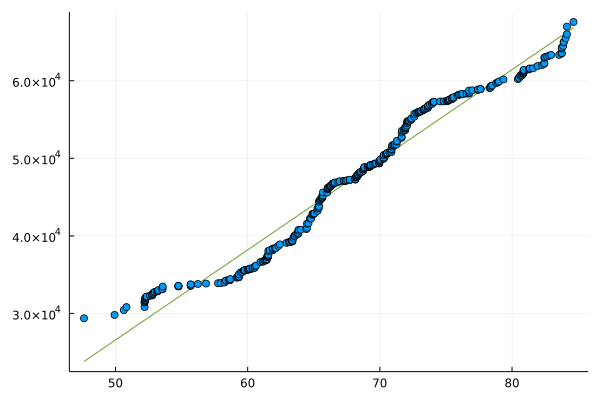

In [113]:
plot(qqplot(Oil, Bit, qqline = :fit))

As we can see, the first and third graphs show us that the lack of normality in the behavior of the data, so that the normal distribution of the same cannot be assumed, for this type of case non-parametric methods are used to study the data. Spearman's correlation coefficient is one such method and we will use it to see the correlation between the price of Bitcoin and the price of gold and oil. 



The Spearman's correlation coefficient is given by

\begin{equation*}
r_R = 1 - \frac{6\cdot \sum_i d_i^2}{n(n^2-1)}
\end{equation*}

where $n$ is the number of points and $d_i$R is de difference of the rank of element $i$.

The interpretation of Spearman's correlation coefficient $\rho$ is thus
* If $\rho = 1$ it means a perfect rank association.
* If $\rho = 0$ it means that there is no rank association.
* If $\rho = -1$ it means a perfect negative rank association.

If $\rho$ approaches zero, the association between the ranks is weaker. 

In [114]:
display(corspearman(Gold, Bit))
display(corspearman(Oil, Bit))

-0.4186736125021538

0.1449221624986734

We are going to compare the results obtained, that is, we will compare the different correlation coefficients of each pair of variables.

The Pierson's correlation coefficient of Bitcoin with Gold prices is $-0.447571$, while the Spearman's correlation coefficient is $-0.4186736125021538$. We can see that the results are similar, because in both of them the correlation is negative and it is weak since the coefficients are closer to $0$ than to $-1$ 

On the other hand, the Pierson's correlation coefficient of Bitcoin with Oil prices is $0.231068$, while the Spearman's correlation coefficient is $0.1449221624986734$. We can see that the results has a similar interpretation, because their difference is small, also in both of them the correlation is positive and it is very weak since the coefficients are closer to $0$ than to $1$.


As we can see, in the second graph, the data has a behavior that tends to the diagonal, so we can assume that the distribution of these data is normal, therefore we will only take into account the Pearson's correlation coefficient ($−0.322458$) , which tells us that the relationship between the price of bitcoin and the price of silver is linearly negative, but being closer to $0$ than $1$ is weak. 

In conclusion, we see that the correlation between the three comodities and the price of bitcoin is very weak, that is, regardless of whether the correlation is positive or negative, the incidence of each variable on the behavior of the price of bitcoin is very low. 